# ORIE 4580/5580/5581 Assignment 4

#### Students: Junliang Wu (jw2727) and Kexin Wang (kw677)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.



We first find standard deviation for each instrument. $\sigma_{U.S.stocks}=0.25; \sigma_{U.S.bonds}=0.1; \sigma_{EM bonds}=0.3$

$$
P(X_1>0) = 1-P(X_1<=0)=1-P(Z_1<=\frac{0-0.14}{0.25})=1-P(Z_1<=-0.56)=1-0.28774=0.71226
$$
$$
P(X_2>0)=1-P(Z_2<=\frac{0-0.07}{0.1})=1-P(Z_2<=-0.7)=1-0.24196=0.75804
$$
$$
P(X_3>0)=1-P(Z_3<=\frac{0-0.16}{0.3})=1-P(Z_3<=-0.533)=1-0.2969=0.7031
$$
Since all three instruments are independent, we know $P(X_1>0,X_2>0,X_3>0)=P(X_1>0)P(X_2>0)P(X_3>0)=0.71226*0.75804*0.7031=0.38$

___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



In [63]:
import numpy as np
from scipy import linalg

cov_matrix=[[0.0625,-0.01,0.0375],[-0.01,0.01,-0.015],[0.0375,-0.015,0.09]]
mu = [0.14,0.07,0.16]
L = np.linalg.cholesky(cov_matrix)
num_simulations = 1000

count = 0
for _ in range(num_simulations):
    N = np.random.randn(3)
    values = mu + np.dot(L, N)
    if (values[0]>0 and values[1]>0 and values[2]>0):
        count += 1

probability = count / num_simulations
print(probability)


0.389


___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


For any $X ~ U[\alpha,\beta], \mu = \frac{\alpha+\beta}{2}$, so $\alpha=-\beta$. $\sigma^{2} = \frac{(\beta-\alpha)^{2}}{12} = 1$, so $4\beta^{2}=12, \beta=+-\sqrt{3}$ Since $\alpha = -\beta$, we know that $\alpha=-\sqrt{3}, \beta=\sqrt{3}$.

## Ans.


___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.


$E(V_2) = E((1-B)X_1+BX_2) = E(1-B)E(X_1) + E(B)E(X_2)$(since they are independent) $=(1-p)*\frac{\alpha+\beta}{2} + p*\frac{\alpha+\beta}{2} = \frac{\alpha+\beta}{2}$

$Var(V_2) = E(V_2^{2})-E(V_2)^{2}$，$E(V_2^{2}) = P(B=0)*E(X_1^{2})+P(B=1)*E(X_2^{2})$.

$E(X_2^{2}) = Var(X) + E(X)^{2} = \frac{(\beta-\alpha)^{2}}{12} + \frac{(\beta+\alpha)^{2}}{4} = \frac{\alpha^{2}+\alpha\beta+\beta^{2}}{3}$

Therefore, $Var(V_2)=(1-p)*\frac{\alpha^{2}+\alpha\beta+\beta^{2}}{3}+p*\frac{\alpha^{2}+\alpha\beta+\beta^{2}}{3}-\frac{\alpha^{2}+2\alpha\beta+\beta^{2}}{4}=\frac{\alpha^{2}-2\alpha\beta+\beta^{2}}{12}$

___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___

$Cov(V_1,V_2) = E(V_1V_2)-E(V_1)E(V_2)$, so $E(V_1V_2) = P(B=0)*E(X_1^{2})+P(B=1）*E(X_1X_2) = (1-p)*\frac{\alpha^{2}+\alpha\beta+\beta^{2}}{3}+p*\frac{\alpha^{2}+2\alpha\beta+\beta^{2}}{4}-\frac{\alpha^{2}+2\alpha\beta+\beta^{2}}{4}=(1-p)*\frac{(\alpha-\beta)^{2}}{12}$

$\sigma_{12} = (1-p)*\frac{(\alpha-\beta)^{2}}{12}, p = 1-\frac{12\sigma_{12}}{(\alpha-\beta)^{2}}$

## Ans.


___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

## Ans.

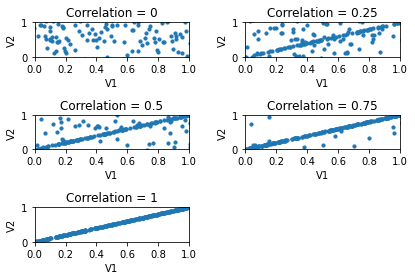

In [64]:
import numpy as np
import matplotlib.pyplot as plt

correlation_values = [0, 0.25, 0.5, 0.75, 1]
def func_plot_generate(correlation_values, num_samples=1000):
    def func_generate(sigma12):
        x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), num_samples)
        x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), num_samples)
        b = np.random.choice([0, 1], num_samples, p=[sigma12, 1-sigma12])
        v1 = x1
        v2 = np.where(b == 0, x1, x2)
        return v1, v2

    for i, sigma12 in enumerate(correlation_values):
        v1, v2 = func_generate(sigma12)

        plt.subplot(3, 2, i + 1)
        plt.scatter(v1, v2, s=10)
        plt.title(f'Correlation = {sigma12}')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.xlabel('V1')
        plt.ylabel('V2')

    plt.tight_layout()
    plt.show()

func_plot_generate(correlation_values)


Reference: ChatGPT

___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

In [65]:
import numpy as np

def generate(sigma12, num_samples=10000):
    # Generate independent uniform random variables X1 and X2 on [0, 1]
    x1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), num_samples)
    x2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), num_samples)
    b = np.random.choice([0, 1], num_samples, p=[sigma12, 1-sigma12])
    v1 = x1
    v2 = np.where(b == 0, x1, x2)
    return v1, v2

def estimate_probability(sigma12, num_samples=10000):
    # Generate correlated uniform variables V1 and V2 based on sigma12
    v1, v2 = generate(sigma12, num_samples=num_samples)

    # Calculate the probability P[V1 ≤ 0, V2 ≤ 0]
    probability = np.mean((v1 <= 0) & (v2 <= 0))

    return probability

# Specify the correlation value (sigma12) for the case
sigma12 = 0.5

# Estimate the probability P[V1 ≤ 0, V2 ≤ 0] for the specified correlation
probability = estimate_probability(sigma12)

print(probability)



0.3756


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.


0.3341


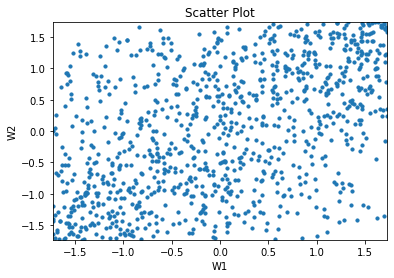

In [66]:
from scipy.stats import norm
sigma12 = 0.5
alpha = -np.sqrt(3)
beta = np.sqrt(3)

def generate_variables(sigma12, alpha, beta, num_samples=10000):
    mu = np.array([0, 0])
    cov_matrix = np.array([[1, sigma12], [sigma12, 1]])
    z1, z2 = np.random.multivariate_normal(mu, cov_matrix, num_samples).T
    w1 = alpha + (beta - alpha) * norm.cdf(z1)
    w2 = alpha + (beta - alpha) * norm.cdf(z2)

    return w1, w2

def estimate(sigma12, alpha, beta, num_samples=10000):
    w1, w2 = generate_variables(sigma12, alpha, beta, num_samples=num_samples)
    probability = np.mean((w1 >= 0) & (w2 >= 0))

    return probability

probability = estimate(sigma12, alpha, beta)
print(probability)

w1, w2 = generate_variables(sigma12, alpha, beta, num_samples=1000)
plt.scatter(w1, w2, s=10)
plt.xlim(alpha, beta)
plt.ylim(alpha, beta)
plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Scatter Plot')
plt.show()


___
___

# Question 3: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

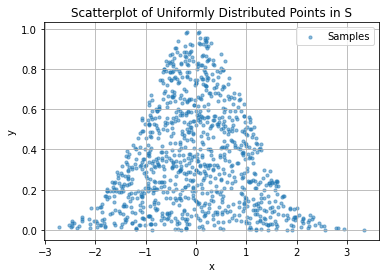

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of samples
num_samples = 1000

# Generate random x values uniformly distributed over a range (adjust as needed)
x_values = np.random.normal(0, 1, num_samples)

upper_bounds = np.exp(-x_values**2/2)

# Generate samples from a uniform distribution for each x_value
uniform_samples = np.random.uniform(0, upper_bounds, len(x_values))

# Create a scatterplot of the points
plt.scatter(x_values, uniform_samples, s=10, alpha=0.5, label='Samples')


# Set labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.grid()
plt.title('Scatterplot of Uniformly Distributed Points in S')
plt.show()

___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

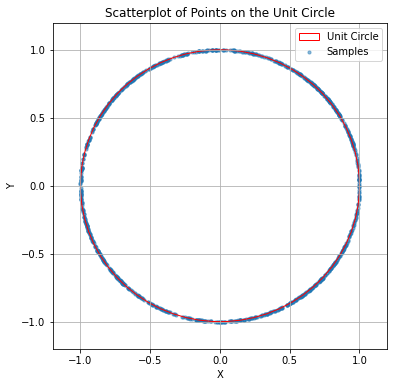

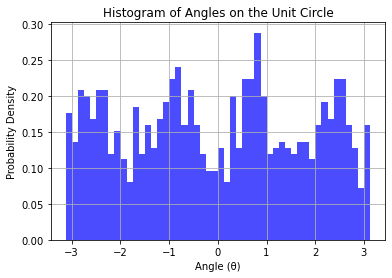

In [18]:

import numpy as np
import matplotlib.pyplot as plt

# Set the number of points
num_points = 1000

# Generate random points uniformly in the square [-1, 1] x [-1, 1]
u_values = np.random.uniform(-1, 1, num_points)
v_values = np.random.uniform(-1, 1, num_points)

# Project the points onto the unit circle
x_values = u_values / np.sqrt(u_values**2 + v_values**2)
y_values = v_values / np.sqrt(u_values**2 + v_values**2)

# Create a scatterplot of the points
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, s=10, alpha=0.5, label='Samples')

# Plot the unit circle
circle = plt.Circle((0, 0), 1, color='red', fill=False, label='Unit Circle')
plt.gca().add_patch(circle)

# Set axis limits and labels
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('X')
plt.ylabel('Y')

# Add a legend
plt.legend()

# Show the plot
plt.grid()
plt.title('Scatterplot of Points on the Unit Circle')
plt.show()


# Calculate the angles
angles = np.arctan2(y_values, x_values)

# Create a histogram of the angles
plt.hist(angles, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Angle (θ)')
plt.ylabel('Probability Density')
plt.title('Histogram of Angles on the Unit Circle')
plt.grid()

# Show the plot
plt.show()

Reference: Chatgpt

As we can see from the histogram, the distribution is not unifrom on the circumference of the circle.



---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

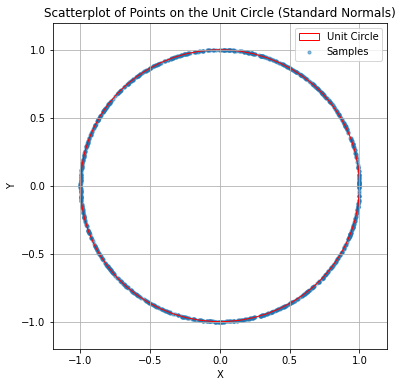

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of points
num_points = 1000

# Generate random standard normal variables Z and W
z_values = np.random.normal(0, 1, num_points)
w_values = np.random.normal(0, 1, num_points)

# Project the points onto the unit circle
x_values = z_values / np.sqrt(z_values**2 + w_values**2)
y_values = w_values / np.sqrt(z_values**2 + w_values**2)

# Create a scatterplot of the points
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, s=10, alpha=0.5, label='Samples')

# Plot the unit circle
circle = plt.Circle((0, 0), 1, color='red', fill=False, label='Unit Circle')
plt.gca().add_patch(circle)

# Set axis limits and labels
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('X')
plt.ylabel('Y')

# Add a legend
plt.legend()

# Show the plot
plt.grid()
plt.title('Scatterplot of Points on the Unit Circle (Standard Normals)')
plt.show()

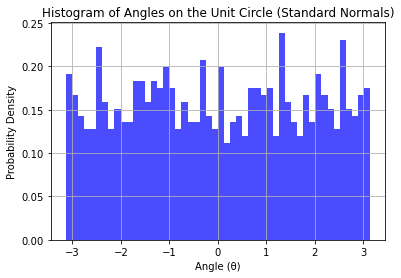

In [20]:
# Calculate the angles for the points
angles = np.arctan2(y_values, x_values)

# Create a histogram of the angles
plt.hist(angles, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Angle (θ)')
plt.ylabel('Probability Density')
plt.title('Histogram of Angles on the Unit Circle (Standard Normals)')
plt.grid()

# Show the plot
plt.show()

Reference: Chatgpt

As we can see from the histogram, the distribution is almost unifrom on the circumference of the circle.
In part(b) I generated points uniformly distributed on the circumference of the unit circle by projecting random points from a square onto the circle. The distribution of angles in this case is not uniform because the transformation from the square to the circle introduces a distortion since the area inside the unit circle is different that the area outside of the unit circle. Therefore when projecting, points near corners will be projected into certain angles and result in a more dense distribution there. 
part (c) takes advantage of the natural properties of the standard normal distribution and the independence of components to ensure a more uniform distribution of points on the unit circle after projection. The standard normal distribution is symmetric around its mean, which is at 0. This means that the probability of generating values that are far from 0 is lower compared to values closer to 0. In other words, points generated from the standard normal distribution tend to be concentrated around the mean (0), resulting in a denser distribution near the origin.\
\
\
\
\
\
\
\

___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

In [67]:
import numpy as np

# Set the number of passengers
num_passengers = 10000

# Generate random arrival times uniformly distributed in [0, 1000]
arrival_times = np.random.uniform(0, 1000, num_passengers)

# Sort the passengers by arrival time
sorted_arrival_times = np.sort(arrival_times)

class Passenger:
    def __init__(self, passenger_id, arrival_time):
        self.passenger_id = passenger_id
        self.arrival_time = arrival_time
        self.waiting_time = None  # Initialize waiting time as None

    def wait_time(self):
        if self.arrival_time % 10 == 0:
            self.waiting_time = 0
        else:
            tenth = self.arrival_time // 10
            self.waiting_time = 10* tenth +10 - self.arrival_time
        return self.waiting_time
    

We will use sorted_arrival_times as passengers' arrival times in the following.

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [68]:
# Calculate waiting time for each passneger and store it in waiting_time list
passengers = []
waiting_time = []
for i in range(num_passengers):
    arrival_time = sorted_arrival_times[i]
    passenger = Passenger(i, arrival_time)
    passengers.append(passenger)
    wait_time = passenger.wait_time()
    waiting_time.append(wait_time)

average_waiting_time = np.mean(waiting_time)

# Print the result
print(f"Expected Waiting Time: {average_waiting_time:.2f} minutes")

###CI
std = np.std(waiting_time)
lower_bound = average_waiting_time -1.96*std/np.sqrt(10000)
upper_bound = average_waiting_time +1.96*std/np.sqrt(10000)
print('CI is [',lower_bound,',', upper_bound,']' )

Expected Waiting Time: 5.05 minutes
CI is [ 4.990326476524938 , 5.103281306446679 ]


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [69]:
mean_interarrival_time = 10  # minutes
train_arrival_times = np.cumsum(np.random.exponential(scale=mean_interarrival_time, size=110))

closest_train_arrival_time = min(filter(lambda x: x > arrival_time, train_arrival_times))


In [70]:
print(train_arrival_times)
print(len(train_arrival_times))

[   8.31365206   11.96567456   40.36685435   53.28244217   55.59573567
   60.09820331   86.72655494  107.98489727  115.38703776  129.53995629
  133.64440439  140.38202765  147.43800989  162.4361178   168.62562863
  176.2101243   181.59474536  191.85109683  198.36630328  221.12468901
  222.36472949  227.65374543  228.40011459  234.703692    234.90475877
  241.17504539  243.40846443  248.56295397  259.78207056  282.78606211
  289.78219096  304.42410462  305.78309307  307.15025238  333.16808558
  337.75975189  345.75695236  392.39132689  397.19789668  413.97140574
  414.02777877  416.03763253  437.08922275  439.11954392  440.98943689
  461.30124333  462.79713783  464.78991256  478.60964764  479.97403883
  480.08058874  480.34908881  496.17269578  507.8613338   513.77137038
  530.66193788  539.3133205   550.50138163  550.75387957  552.15165655
  595.96057718  596.25975575  605.33825507  606.44769325  626.3020658
  627.0574909   645.76104443  658.38655397  668.4516926   682.83557319
  695.1

In [71]:
waiting_time_b = []
for i in range(num_passengers):
    closest_train_arrival_time = min(filter(lambda x: x > sorted_arrival_times[i], train_arrival_times))
    wait_time = closest_train_arrival_time - sorted_arrival_times[i]
    waiting_time_b.append(wait_time)

In [72]:
#print(waiting_time_b)
#print(waiting_time_b)
print('The mean waiting time is ',np.mean(waiting_time_b))
lower_bound_b = np.mean(waiting_time_b) - 1.96 * np.std(waiting_time_b)/np.sqrt(10000)
#print(lower_bound_b)
upper_bound_b = np.mean(waiting_time_b) + 1.96 * np.std(waiting_time_b)/np.sqrt(10000)
#print(upper_bound_b)
print('The CI is [',lower_bound_b,',',upper_bound_b,']')

The mean waiting time is  10.046096555828832
The CI is [ 9.868630091567427 , 10.223563020090237 ]


___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [73]:
# Calculate individual time intervals between consecutive arrivals
inter_arrival = np.diff(train_arrival_times) # my train_arrival_times has 10100 values but only
#print(inter_arrival)
mean_inter_arrival =np.mean(inter_arrival)
print('The mean is ', mean_inter_arrival)
std_inter_arrival = np.std(inter_arrival)/np.sqrt(10000)
#print(std_inter_arrival)


lower_bound_inter_arrival = mean_inter_arrival- 1.96 * std_inter_arrival
upper_bound_inter_arrival = mean_inter_arrival + 1.96 * std_inter_arrival
print('The CI is [',lower_bound_inter_arrival,',',upper_bound_inter_arrival,']')


The mean is  10.643061207598711
The CI is [ 10.447650182963399 , 10.838472232234023 ]


___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

In [74]:
print(train_arrival_times)

[   8.31365206   11.96567456   40.36685435   53.28244217   55.59573567
   60.09820331   86.72655494  107.98489727  115.38703776  129.53995629
  133.64440439  140.38202765  147.43800989  162.4361178   168.62562863
  176.2101243   181.59474536  191.85109683  198.36630328  221.12468901
  222.36472949  227.65374543  228.40011459  234.703692    234.90475877
  241.17504539  243.40846443  248.56295397  259.78207056  282.78606211
  289.78219096  304.42410462  305.78309307  307.15025238  333.16808558
  337.75975189  345.75695236  392.39132689  397.19789668  413.97140574
  414.02777877  416.03763253  437.08922275  439.11954392  440.98943689
  461.30124333  462.79713783  464.78991256  478.60964764  479.97403883
  480.08058874  480.34908881  496.17269578  507.8613338   513.77137038
  530.66193788  539.3133205   550.50138163  550.75387957  552.15165655
  595.96057718  596.25975575  605.33825507  606.44769325  626.3020658
  627.0574909   645.76104443  658.38655397  668.4516926   682.83557319
  695.1

In [75]:
print(sorted_arrival_times)

[1.27208829e-01 1.85613600e-01 2.46801965e-01 ... 9.99547240e+02
 9.99606717e+02 9.99844856e+02]


In [76]:
def find_smallest_difference(A, B):
    result = []
    i = 0  # Initialize the index in array B

    for a in A:
        # Find the smallest element in B that is greater than or equal to a
        while i < len(B) and B[i] < a:
            i += 1

        # Calculate B[i] - B[i-1] and append it to the result list
        if i == 0:
            result.append(B[i])
        elif i == len(B):
            result.append(None)  # No greater or equal element found in B
        else:
            result.append(B[i] - B[i - 1])

    return result

# Example usage:
A = [1, 3, 5, 7, 9]
B = [2, 3, 6, 8, 10]
differences = find_smallest_difference(A, B)
print(differences)  # Output: [2, 2, 2, 2, 2]

[2, 1, 3, 2, 2]


In [77]:
# Initialize a list to store the differences
differences = find_smallest_difference(sorted_arrival_times, train_arrival_times)
low = np.mean(differences)-1.96 *np.std(differences )/np.sqrt(10000)
up = np.mean(differences)+ 1.96 *np.std(differences )/np.sqrt(10000)
print('The mean of the second setting is',np.mean(differences))

print("CI of the second setting is [",low,up,']' )

The mean of the second setting is 20.171332905383146
CI of the second setting is [ 19.935555084672604 20.407110726093688 ]


In [78]:
train_arrival_times_first = [i for i in range(0, 1001, 10)]
#print(train_arrival_times_first)
difference_first = find_smallest_difference(sorted_arrival_times, train_arrival_times_first)
#print(difference_first)
print('The mean of the first setting is',np.mean(difference_first))
print("CI of the second setting is [",np.mean(difference_first)-1.96*np.std(difference_first)/np.sqrt(10000),',',np.mean(difference_first)+1.96 *np.std(difference_first)/np.sqrt(10000),']' )

The mean of the first setting is 10.0
CI of the second setting is [ 10.0 , 10.0 ]


* (The first Setting ) Since the inter-arrival time between two trains is always 10, so it's intuitive that mean is 10 and CI is [10,10]
* (Second Setting)The mean is higher than the previous parts which I think is intuitive. Because the I_i we used here is a similar concept to a passenger's waiting time except that we assume every passenger arrives right after the previous train left, so he/she will wait the whole inter-arrival time between two trains. The reason we get numbers that are larger than part(a) and part(b) is that, every number in our sample is greater or equal to sample in previous parts. For example, in part (a), if a passenger arrives at 5, the waiting time for her/him is 10-5 =5, but in (d) we use 10-0=10. That's why the mean is larger. However the CI range are similar to (b) and (c)

**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

# 